In [16]:
from PIL import ImageGrab
from IPython.display import display, Image

def ins(ratio=1.0):
    im_data = ImageGrab.grabclipboard()
    new_size = tuple([int(i*ratio) for i in im_data.size])
    thumb = im_data.resize(new_size)
    fn = "temp.PNG"
    thumb.save(fn)
    img = Image(filename=fn)
    display(img)

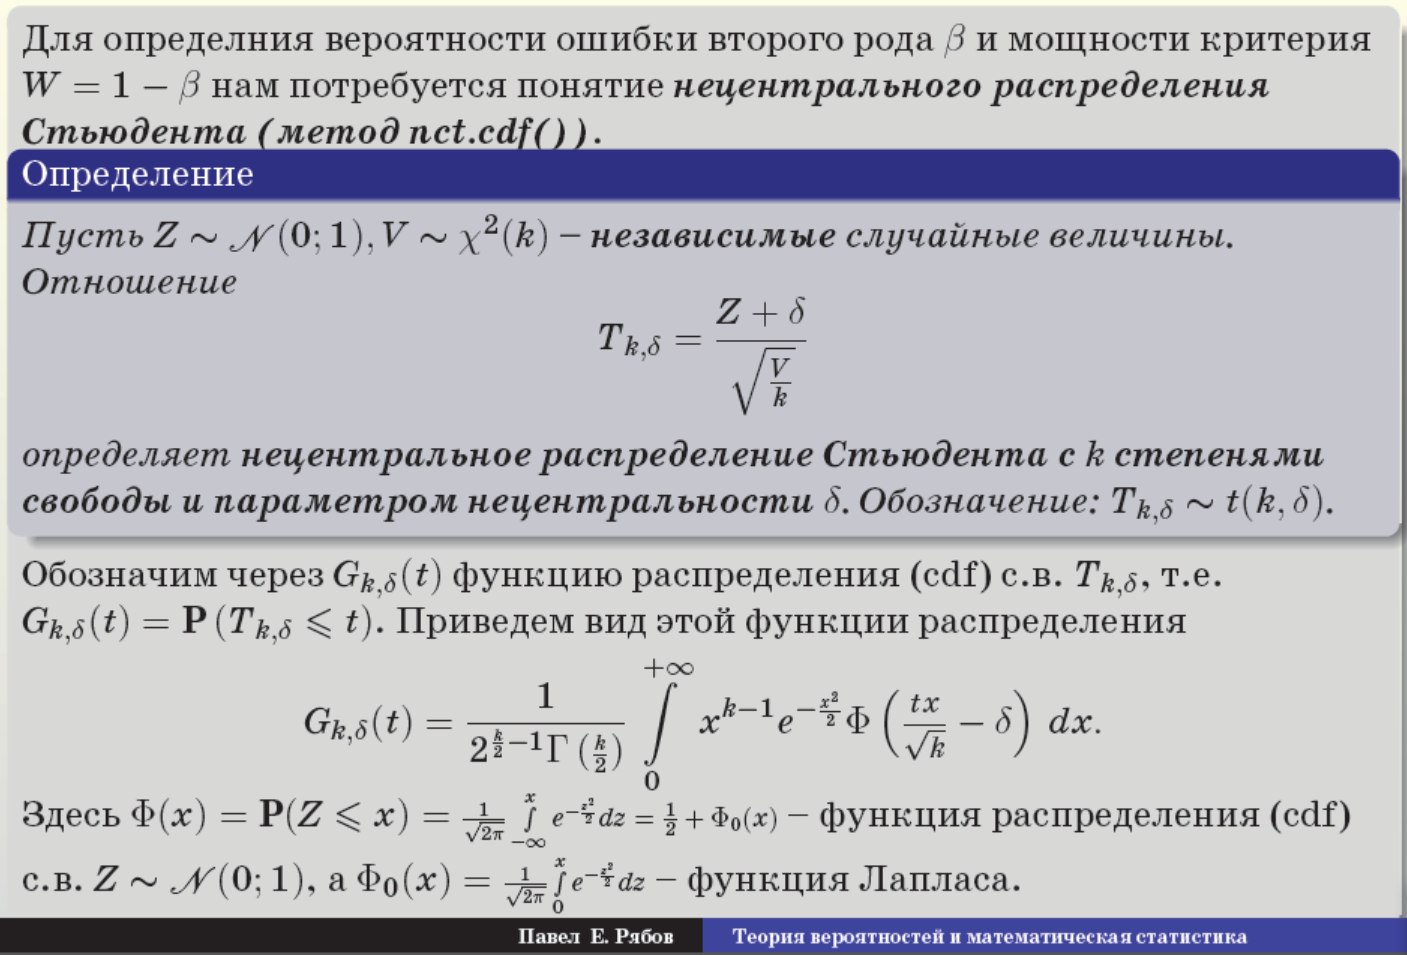

In [17]:
ins(1)

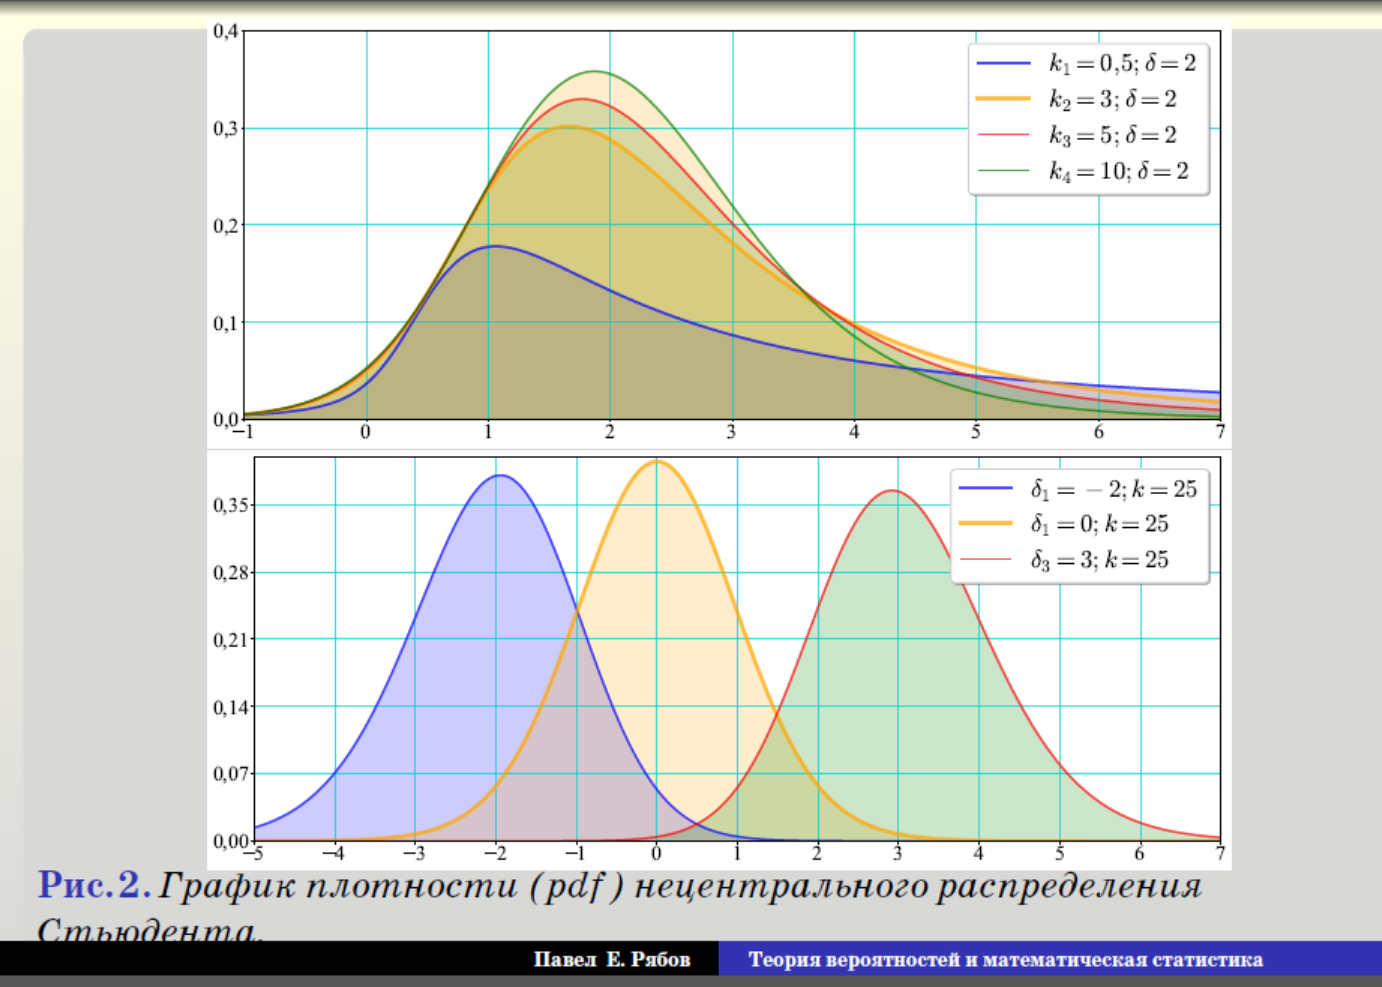

In [18]:
ins(1)

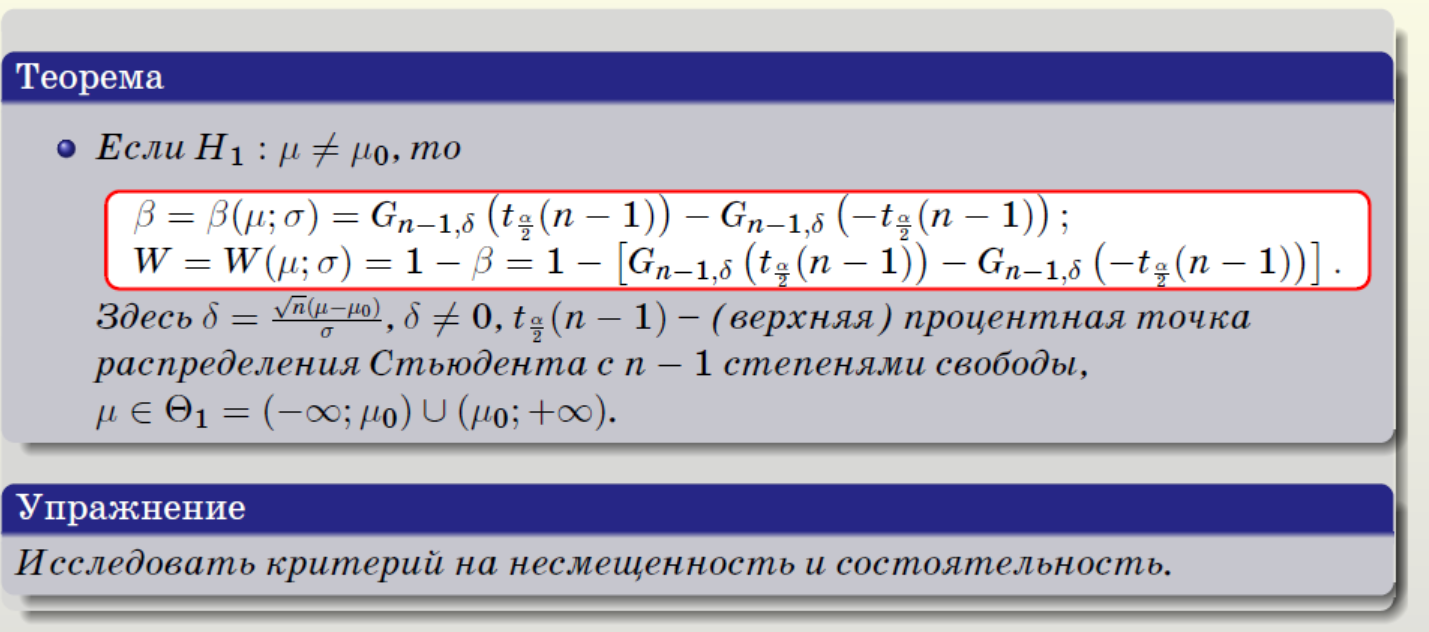

In [19]:
ins(1)

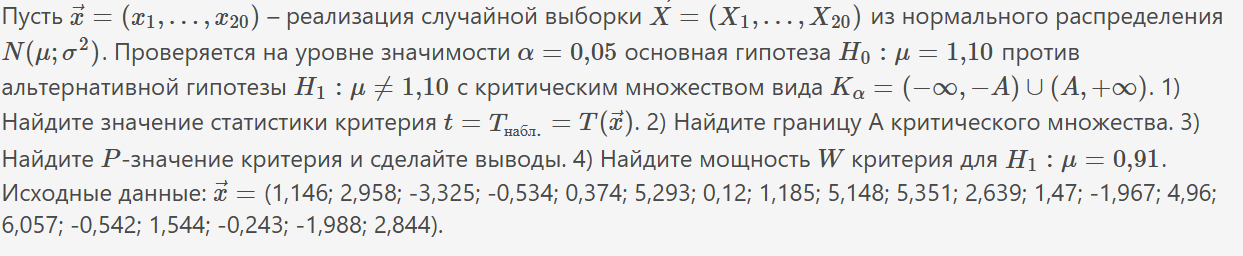

In [3]:
import numpy as np
from scipy.stats import t,nct

def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

text = '1,146; 2,958; -3,325; -0,534; 0,374; 5,293; 0,12; 1,185; 5,148; 5,351; 2,639; 1,47; -1,967; 4,96; 6,057; -0,542; 1,544; -0,243; -1,988; 2,844'
splitter = ';'
locale = 'rus'
# Заданные параметры
mu_0 = 1.10  #H0
alpha = 0.05
# Новое значение гипотезы
mu_1 = 0.91



if locale== 'rus':
    x = np.array(text.replace(',','.').split(splitter)).astype(float)
else:
    x = np.array(text.split(splitter)).astype(float)
    
n = x.size

# Вычисление
x_bar = np.mean(x)
s = np.std(x, ddof=1)
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

# Критические значения
t_critical = t.ppf(1 - alpha/2, df=n-1)  # Критическое значение для уровня 0.05
K_alpha = (-t_critical, t_critical)

print("Значение статистики критерия = " + one_rrstr(t_stat,3))
print("Граница А критического множества = " + one_rrstr(t_critical,3))
print("Гипотеза H0 отвергается." if not (K_alpha[0] <= t_stat <= K_alpha[1]) else "Гипотеза H0 принимается.")


p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print("P-значение критерия = " + one_rrstr(p_value,3) )




# Параметры для Beta
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
# Далее должно использовано НЕЦЕНТРАЛЬНОЕ распределение Стьюдента (метод nct)
beta = t.cdf(t_critical - delta, df=n-1) - t.cdf(-t_critical - delta, df=n-1)
power = 1 - beta

print("Мощность критерия = " + one_rrstr(power,3))

Значение статистики критерия = 0,857
Граница А критического множества = 2,093
Гипотеза H0 принимается.
P-значение критерия = 0,402
Мощность критерия = 0,059


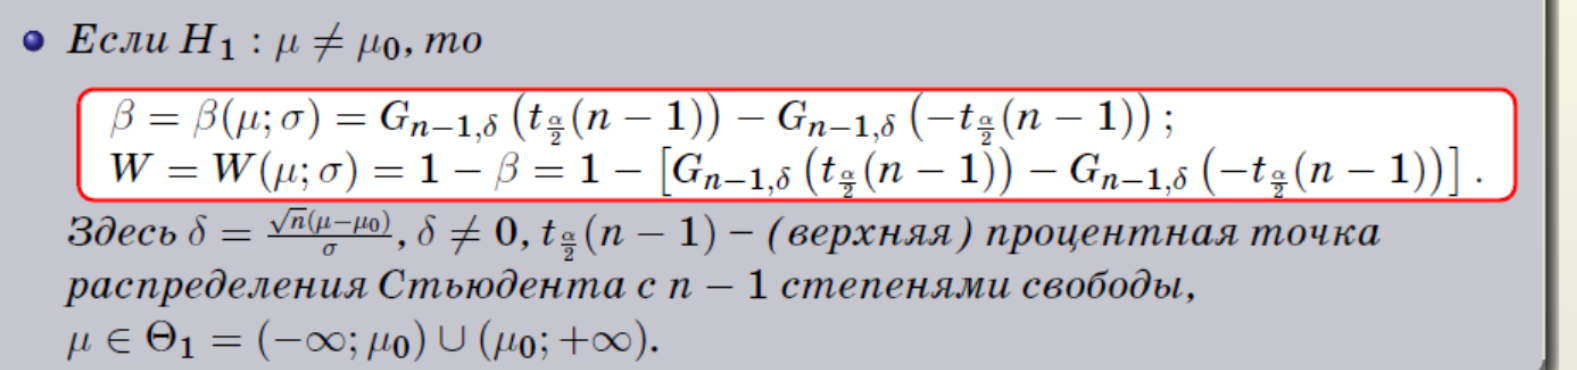

In [20]:
ins(1)

In [13]:
mu_0 = 1.10  #H0
alpha = 0.05
# Новое значение гипотезы
mu_1 = 0.91
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
##########################
df=n-1
G=nct(df,delta)
T=t(df)
talpha2=T.isf(alpha/2)
beta=G.cdf(talpha2)-G.cdf(-talpha2)
W=1-beta
beta,W

(0.9399713041972337, 0.06002869580276626)

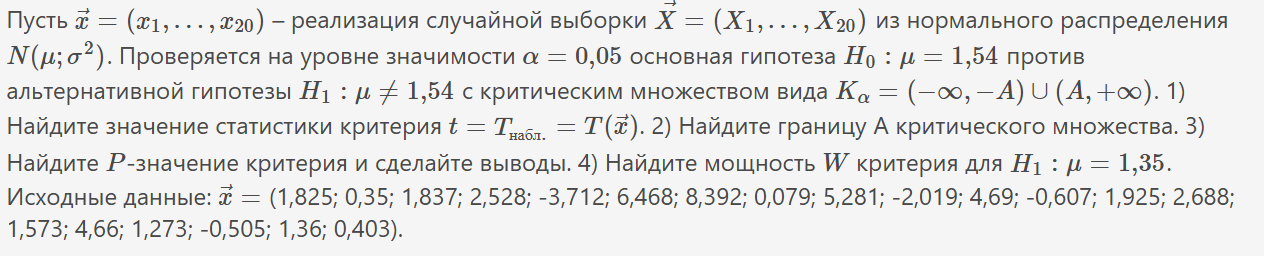

In [14]:
import numpy as np
from scipy.stats import t

def one_rrstr(x,n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

text = '1,825; 0,35; 1,837; 2,528; -3,712; 6,468; 8,392; 0,079; 5,281; -2,019; 4,69; -0,607; 1,925; 2,688; 1,573; 4,66; 1,273; -0,505; 1,36; 0,403'
splitter = ';'
locale = 'rus'
# Заданные параметры
mu_0 = 1.54  #H0
alpha = 0.05
# Новое значение гипотезы
mu_1 = 1.35



if locale== 'rus':
    x = np.array(text.replace(',','.').split(splitter)).astype(float)
else:
    x = np.array(text.split(splitter)).astype(float)
    
n = x.size

# Вычисление
x_bar = np.mean(x)
s = np.std(x, ddof=1)
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

# Критические значения
t_critical = t.ppf(1 - alpha/2, df=n-1)  # Критическое значение для уровня 0.05
K_alpha = (-t_critical, t_critical)

print("Значение статистики критерия = " + one_rrstr(t_stat,3))
print("Граница А критического множества = " + one_rrstr(t_critical,3))
print("Гипотеза H0 отвергается." if not (K_alpha[0] <= t_stat <= K_alpha[1]) else "Гипотеза H0 принимается.")


p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print("P-значение критерия = " + one_rrstr(p_value,3) )




# Параметры для Beta
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
beta = t.cdf(t_critical - delta, df=n-1) - t.cdf(-t_critical - delta, df=n-1)
power = 1 - beta

print("Мощность критерия = " + one_rrstr(power,3))

Значение статистики критерия = 0,595
Граница А критического множества = 2,093
Гипотеза H0 принимается.
P-значение критерия = 0,559
Мощность критерия = 0,058


In [15]:
mu_0 = 1.54  #H0
alpha = 0.05
# Новое значение гипотезы
mu_1 = 1.35
delta = (mu_1 - mu_0) / (s / np.sqrt(n))
##########################
df=n-1
G=nct(df,delta)
T=t(df)
talpha2=T.isf(alpha/2)
beta=G.cdf(talpha2)-G.cdf(-talpha2)
W=1-beta
beta,W

(0.9409973991012704, 0.05900260089872955)